In [457]:
import pandas as pd

In [458]:
production = pd.read_csv("/content/drive/MyDrive/Production_Crops_Livestock_E_All_Data_(Normalized).csv", encoding='latin-1')

In [459]:
value = pd.read_csv("/content/drive/MyDrive/Value_of_Production_E_All_Data_(Normalized).csv",encoding='latin-1')

In [460]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [461]:
# Atualmente, a taxa de crescimento da população mundial é de 1,1% (ONU, 2020). A
# A população mundial atual é de 7,8 milhões de habitantes e segue um ritmo lento de crescimento.

In [462]:
production.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,2,Afghanistan,221,"Almonds, with shell",5312,Area harvested,1975,1975,ha,0.0,F
1,2,Afghanistan,221,"Almonds, with shell",5312,Area harvested,1976,1976,ha,5900.0,F
2,2,Afghanistan,221,"Almonds, with shell",5312,Area harvested,1977,1977,ha,6000.0,F
3,2,Afghanistan,221,"Almonds, with shell",5312,Area harvested,1978,1978,ha,6000.0,F
4,2,Afghanistan,221,"Almonds, with shell",5312,Area harvested,1979,1979,ha,6000.0,F


In [463]:
value.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,2,Afghanistan,221,"Almonds, with shell",152,Gross Production Value (constant 2014-2016 tho...,1976,1976,1000 Int. $,49550.0,Fc
1,2,Afghanistan,221,"Almonds, with shell",152,Gross Production Value (constant 2014-2016 tho...,1977,1977,1000 Int. $,45505.0,Fc
2,2,Afghanistan,221,"Almonds, with shell",152,Gross Production Value (constant 2014-2016 tho...,1978,1978,1000 Int. $,60673.0,Fc
3,2,Afghanistan,221,"Almonds, with shell",152,Gross Production Value (constant 2014-2016 tho...,1979,1979,1000 Int. $,53089.0,Fc
4,2,Afghanistan,221,"Almonds, with shell",152,Gross Production Value (constant 2014-2016 tho...,1980,1980,1000 Int. $,50055.0,Fc


In [464]:
brazil_valor = value[value['Area'] == 'Brazil'] 
soja_valor = brazil_valor[brazil_valor['Item'] == 'Soybeans']

In [465]:
soja_valor.tail()

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
290865,21,Brazil,236,Soybeans,58,Gross Production Value (constant 2014-2016 tho...,2015,2015,1000 US$,35391243.0,Fc
290866,21,Brazil,236,Soybeans,58,Gross Production Value (constant 2014-2016 tho...,2016,2016,1000 US$,35002665.0,Fc
290867,21,Brazil,236,Soybeans,58,Gross Production Value (constant 2014-2016 tho...,2017,2017,1000 US$,41661256.0,Fc
290868,21,Brazil,236,Soybeans,58,Gross Production Value (constant 2014-2016 tho...,2018,2018,1000 US$,42816097.0,Fc
290869,21,Brazil,236,Soybeans,58,Gross Production Value (constant 2014-2016 tho...,2019,2019,1000 US$,41493238.0,Fc


In [466]:
soja_valor_bruto = soja_valor[soja_valor['Element']=='Gross Production Value (constant 2014-2016 thousand I$)']['Value']

In [467]:
valor_bruto_soja = soja_valor_bruto.values

In [468]:
production.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,2,Afghanistan,221,"Almonds, with shell",5312,Area harvested,1975,1975,ha,0.0,F
1,2,Afghanistan,221,"Almonds, with shell",5312,Area harvested,1976,1976,ha,5900.0,F
2,2,Afghanistan,221,"Almonds, with shell",5312,Area harvested,1977,1977,ha,6000.0,F
3,2,Afghanistan,221,"Almonds, with shell",5312,Area harvested,1978,1978,ha,6000.0,F
4,2,Afghanistan,221,"Almonds, with shell",5312,Area harvested,1979,1979,ha,6000.0,F


In [469]:
brazil = production[production['Area'] == 'Brazil'] 

In [470]:
soja = brazil[brazil['Item'] == 'Soybeans']

In [471]:
soja.Element.unique()
#'Área colhida', 'Rendimento', 'Produção'

array(['Area harvested', 'Yield', 'Production'], dtype=object)

In [472]:
colhida = soja[soja.Element == "Area harvested"]['Value'].values
rendimento = soja[soja.Element == "Yield"]['Value'].values
producao = soja[soja.Element == "Production"]['Value'].values

In [473]:
anos = soja.Year.unique()

In [474]:
anos

array([1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020])

In [475]:
crops = soja.Element.unique().tolist()

In [476]:
df = pd.DataFrame([colhida, rendimento, producao, valor_bruto_soja], columns=anos)

In [477]:
df = df.T.reset_index()

In [478]:
df.columns = ['ano', 'colhida', 'rendimento', 'producao', 'valor']

In [479]:
df

,ano,colhida,rendimento,producao,valor
0,1961,240919.0,11269.0,271488.0,103834.0
1,1962,313640.0,11005.0,345175.0,132017.0
2,1963,339796.0,9503.0,322915.0,123503.0
3,1964,359622.0,8478.0,304897.0,116612.0
4,1965,431834.0,12115.0,523176.0,200096.0
5,1966,490687.0,12125.0,594975.0,227557.0
6,1967,612115.0,11691.0,715606.0,273694.0
7,1968,721913.0,9066.0,654476.0,250314.0
8,1969,906073.0,11661.0,1056607.0,404114.0
9,1970,1318809.0,11439.0,1508540.0,576963.0


#Analise exploratória

In [480]:
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


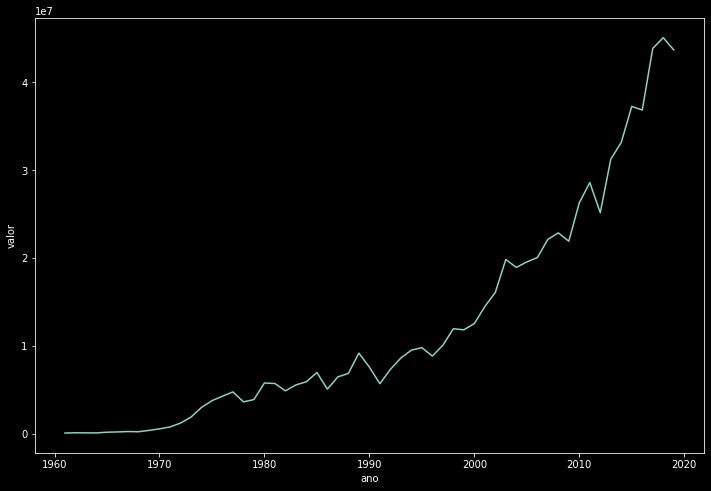

In [481]:
plt.style.use("dark_background")
plt.figure(figsize=(12,8))

sns.lineplot(df['ano'], df['valor'])

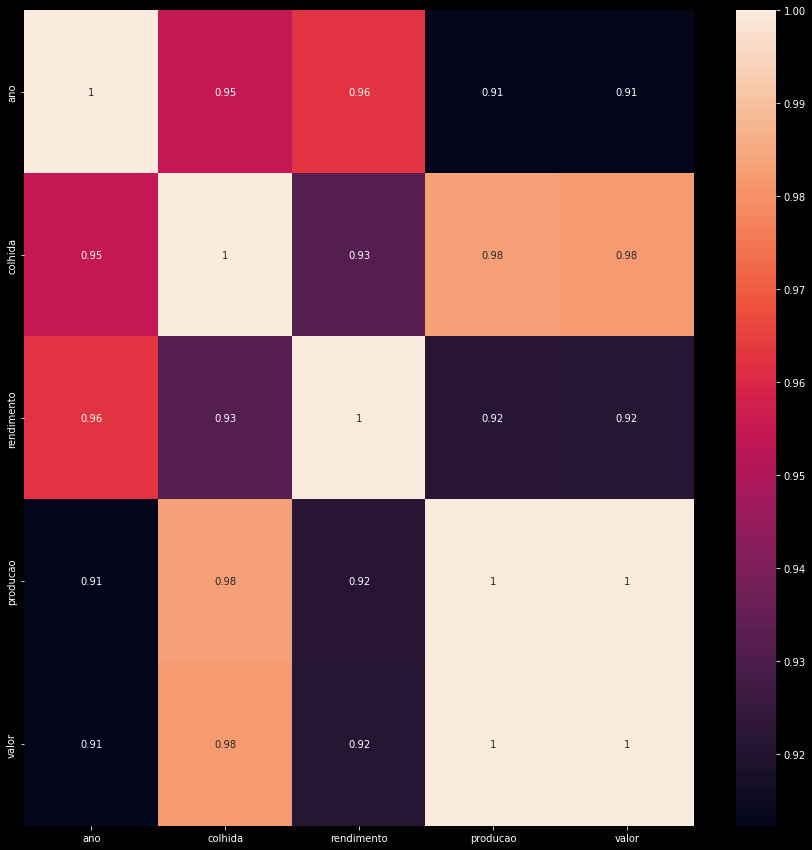

In [482]:
import matplotlib.pyplot as plt
fix, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(df.corr(), annot=True)

In [483]:
# df = df.fillna(lambda x: x.median())

#Pre processamento

In [484]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [485]:
df = clean_dataset(df)

In [486]:
x = df.iloc[:, 0:4]
y = df.iloc[:, 4:]

#Criacao do modelo

In [487]:
from keras.layers import LSTM, Dense
from keras.models import Sequential

In [456]:
regressor = Sequential()
regressor.add(Dense(units = 30, activation="relu", input_dim=4))
regressor.add(Dense(units = 30, activation="relu"))
regressor.add(Dense(units=1, activation='linear'))
regressor.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_squared_error', 'mean_absolute_error', 'mean_absolute_percentage_error', 'cosine_proximity'])
regressor.fit(x, y, batch_size=2, epochs=1000)

Epoch 1/1000
30/30 [==============================] - 1s 2ms/step - loss: 12523549.0000 - mean_squared_error: 336423446118400.0000 - mean_absolute_error: 12523549.0000 - mean_absolute_percentage_error: 103.0230 - cosine_proximity: -0.0508
Epoch 2/1000
30/30 [==============================] - 0s 2ms/step - loss: 1785102.5000 - mean_squared_error: 14340919918592.0000 - mean_absolute_error: 1785102.5000 - mean_absolute_percentage_error: 15.6840 - cosine_proximity: 1.0000
Epoch 3/1000
30/30 [==============================] - 0s 2ms/step - loss: 405529.1562 - mean_squared_error: 542253416448.0000 - mean_absolute_error: 405529.1562 - mean_absolute_percentage_error: 5.9081 - cosine_proximity: 1.0000
Epoch 4/1000
30/30 [==============================] - 0s 2ms/step - loss: 93436.4922 - mean_squared_error: 22198679552.0000 - mean_absolute_error: 93436.4922 - mean_absolute_percentage_error: 0.9179 - cosine_proximity: 1.0000
Epoch 5/1000
30/30 [==============================] - 0s 2ms/step - loss

In [488]:
previsoes =regressor.predict(x)

In [489]:
def mean_squared_error(y_true, y_pred):
    return K.mean(K.square(y_pred - y_true), axis=-1)

In [490]:
# O modelo performou muito bem!

In [491]:
media_y = y.mean()

In [492]:
1.226772e+07

12267720.0

In [493]:
media_previsoes = previsoes.mean()

In [494]:
print(f"Media do y real foi de {12267720}, media do modelo foi de  {media_previsoes}")
print(f"Diferenca de {media_previsoes-media_y}")


Media do y real foi de 12267720, media do modelo foi de  12219579.0
Diferenca de valor   -48138.338983
dtype: float64


In [495]:
                          # ANO  | Area Plantada | produtividade/rendimento | producao em tonnes
novo_entrada = np.array([[2020.0,      37188168.0,         32752.0,            121797712.0]])

In [496]:
soja[soja['Year'] == 2020]

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
316551,21,Brazil,236,Soybeans,5312,Area harvested,2020,2020,ha,37188168.0,NaN
316611,21,Brazil,236,Soybeans,5419,Yield,2020,2020,hg/ha,32752.0,Fc
316671,21,Brazil,236,Soybeans,5510,Production,2020,2020,tonnes,121797712.0,NaN


In [497]:
#Soja no Brasil (maior produtor mundial do grão)
# Produção: 135,409 milhões de toneladas
# Área plantada: 38,502 milhões de hectares
# Produtividade: 3.517 kg/ha
?Fonte: CONAB (Levantamento de 05/2021)
# https://www.embrapa.br/soja/cultivos/soja1/dados-economicos

Object `Fonte` not found.


In [498]:
df.tail(1)

,ano,colhida,rendimento,producao,valor
58,2019.0,35895207.0,31847.0,114316829.0,43703960.0


In [499]:
#valor em 2019 foi de:
print(f'A producao do valor bruta da soja foi de : {43703960.0 * 1000 * 4} Bilhoes de reais')
#174.815.840.000 Bilhoes $ 

A producao do valor bruta da soja foi de : 174815840000.0 Bilhoes de reais


In [500]:
df.tail(5)

,ano,colhida,rendimento,producao,valor
54,2015.0,32181243.0,30286.0,97464936.0,37276856.0
55,2016.0,33183119.0,29049.0,96394820.0,36867575.0
56,2017.0,33959879.0,33785.0,114732101.0,43880930.0
57,2018.0,34777936.0,33904.0,117912450.0,45097300.0
58,2019.0,35895207.0,31847.0,114316829.0,43703960.0


In [501]:
valor_2020 = regressor.predict(novo_entrada)

In [505]:
valor_2020 * 1000 * 4

array([[1.8558529e+11]], dtype=float32)

In [507]:
1.8558529e+11

185585290000.0

In [506]:
print(f'A previsao do valor de prodição da soja sera de  : {valor_2020 * 1000 * 4} Bilhoes de reais')

A previsao do valor de prodição da soja sera de  : [[1.8558529e+11]] Bilhoes de reais


In [504]:
#De acordo com o modelo 2020 sera  de:
#185.585.290.000 Bilhoes R$

# foi de 121,8 milhões de toneladas, gerando R$ 169,1 bilhões. Esse valor é 35,0% superior ao da safra de soja 2019.
#https://www.gov.br/pt-br/noticias/agricultura-e-pecuaria/2021/09/valor-da-producao-agricola-nacional-tem-recorde-em-2020-com-r-470-5-bilhoes#:~:text=A%20produ%C3%A7%C3%A3o%20de%20soja%20do,R%24%20169%2C1%20bilh%C3%B5es.